# Import Library

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Import dataset

In [6]:
# Import dataset
data = pd.read_csv('glass.csv')

# Pisahkan fitur dari label
X = data.drop('Type', axis=1).values
y = data['Type'].values

# Splitting data into the training test dan test set

In [7]:
# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scalling Feature

In [8]:
# Scaling fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# melatih model klasifikasi Naive Bayes pada Training set

In [9]:
from sklearn.naive_bayes import GaussianNB
# Latih model pada set pelatihan
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

# Prediksi

In [10]:
# Lakukan prediksi pada set pengujian
y_pred = classifier.predict(X_test)

# Confusion Matrix

In [11]:
from sklearn.metrics import confusion_matrix
# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[7 1 3 0 0 0]
 [9 3 0 1 0 1]
 [1 0 2 0 0 0]
 [0 3 0 1 0 0]
 [0 0 0 0 3 0]
 [0 0 0 0 0 8]]


# Visualisasi

In [12]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduksi dimensi fitur menjadi 2
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

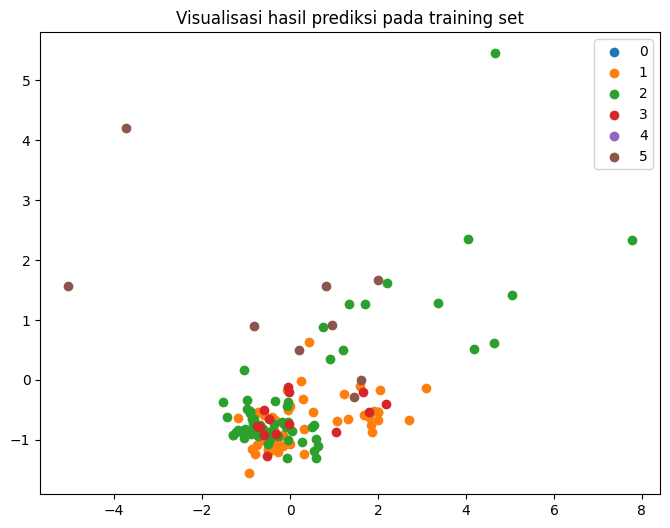

In [16]:
# Visualisasikan hasil prediksi pada Training set
plt.figure(figsize=(8, 6))
for i in range(len(set(y_train))):
    plt.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1], label=i)
plt.title('Visualisasi hasil prediksi pada training set')
plt.legend()
plt.show()

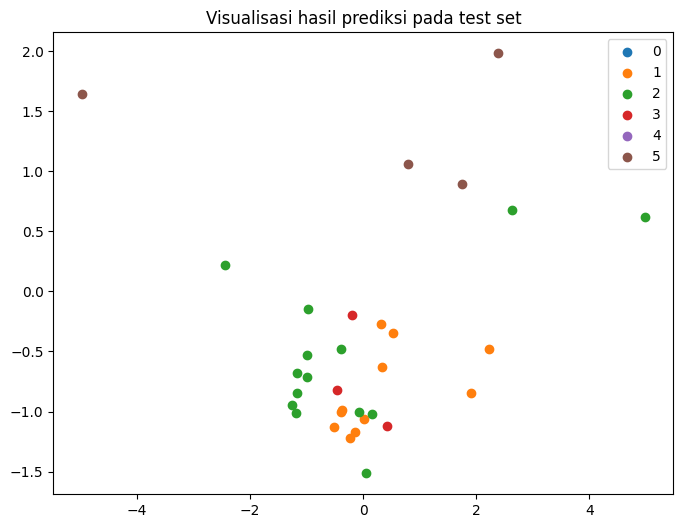

In [17]:
# Visualisasikan hasil prediksi pada Test set
plt.figure(figsize=(8, 6))
for i in range(len(set(y_test))):
    plt.scatter(X_test_pca[y_test == i, 0], X_test_pca[y_test == i, 1], label=i)
plt.title('Visualisasi hasil prediksi pada test set')
plt.legend()
plt.show()